# **의사결정 트리(DecisionTree)**

#### 알콜 도수, 당도, pH 값을 가지고 화이트 와인? 레드 와인? 분류
- wine.csv 파일 사용
- 로지스틱 회귀로 와인 분류
- class 값은 타깃값으로 0이면 레드 와인, 1이면 화이트 와인

In [111]:
# 판다스 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# wine.csv 파일 로딩
wine_df = pd.read_csv('data/wine.csv')

In [91]:
# 처음 5개 샘플 확인
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- 레드 와인과 화이트 와인을 구분하는 이진 분류 문제이고, 화이트 와인이 양성 클래스이다. 즉, 전체 와인 데이터에서 화이트 와인을 골라내는 문제

In [8]:
# 데이터프레임에서 각 열의 데이터 타입과 누락된 데이터가 있는지 확인
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


- 총 6,497개의 샘플이 있고 4개의 열은 모두 실수값이다. Non-Null Count가 모두 6497이므로 누락된 값은 없다.

In [34]:
6497*0.8

5197.6

In [12]:
# 열에 대한 간략한 통계 출력
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


- 위 통계에서 알수 있는 것은 알콜 도수와 당도, pH 값의 스케일이 다르다는 것.
- StandardScaler 클래스를 사용해 특성을 표준화
- 그 전에 먼저 판다스 데이터프레임을 넘파이 배열로 바꾸고 훈련세트와 테스트세트로 나누자.

In [50]:
# alcohol, sugar, pH는 data
# class 열은 target
# 넘파이 배열로 변경
data  = wine_df[['alcohol','sugar','pH']].to_numpy()
target = wine_df['class'].to_numpy()

In [52]:
# data, target을 훈련세트와 테스트세트로 나누기
# 훈련세트 : train_input, train_target
# 테스트세트 : test_input, test_target
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42, train_size=0.8)

In [54]:
# 나눠진 훈련세트와 테스트세트의 크기 확인
# (5197, 3) (1300, 3)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [93]:
# StandardScaler 클래스를 사용해 훈련세트를 전처리
# 같은 객체를 그대로 사용해 테스트세트를 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [95]:
# 표준점수로 변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


- 훈련세트와 테스트세트의 점수가 모두 낮으니 모델이 다소 과소적합된거 같다.

In [99]:
# 로지스틱회귀가 학습한 계수와 절편을 출력해 보자
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


- 위에 출력된 계수와 절편의 값을 잘 설명할 수 있을까?
- 직관적이고 설명하기 쉬운 모델이 결정 트리 모델이다.

### 결정 트리(Decision Tree)
- 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정 트리 모델 훈련
- 새로운 클래스이지만 추정기(estimator) 클래스 이므로 fit() 함수로 훈련하고 score() 함수로 정확도 평가

In [135]:
train_scaled

array([[ 0.01376574,  0.4646116 , -0.16888369],
       [ 1.60871671, -0.70299854,  0.26967864],
       [ 1.10504798, -0.70299854,  1.20945505],
       ...,
       [-0.82568214,  0.0267578 ,  0.14437512],
       [-0.82568214,  0.52716215, -0.23153545],
       [-0.82568214, -0.57789745,  1.83597265]])

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [78]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


- 과대적합? 과소적합? => 과대적합된 모델이라고 볼수 있다.
- 이해하기 쉽도록 그림으로 출력해 보자 => 사이킷런은 plot_tree() 함수를 사용해 결정트리를 그림으로 출력해 줌

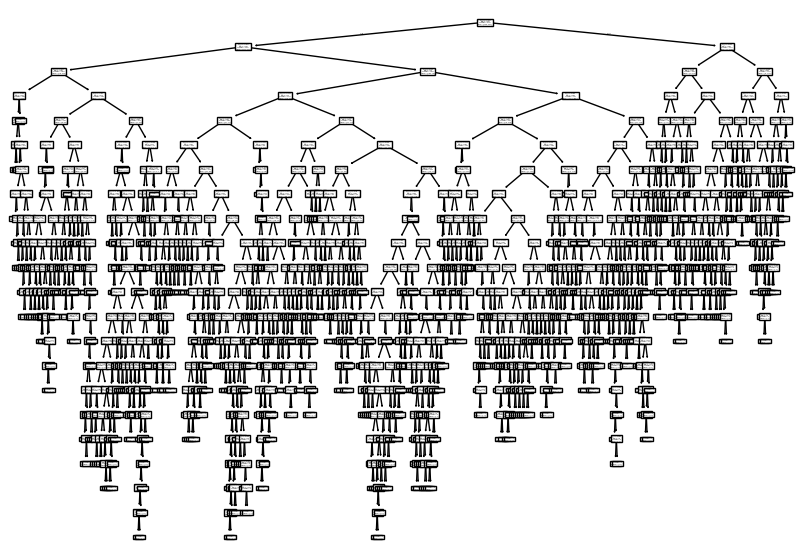

In [121]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 엄청난 트리가 만들어졌다.
- 진짜 나무는 밑에서부터 하늘로 자라나지만, 결정 트리는 위에서부터 아래로 거꾸로 자란다.
- 맨 위의 노드(node)를 루트노드, 맨 아래 노드를 리프(leaf) 노드라고 한다.

- 너무 복잡하니 plot_tree() 함수에서 트리의 깁이를 제한해서 출력해보자.
- max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그린다.
- filled 매개변수에서 클래스에 맞게 노드의 색을 칠할 수 있다.
- feature_names 매개변수에는 특성의 이름을 전달할 수 있다.

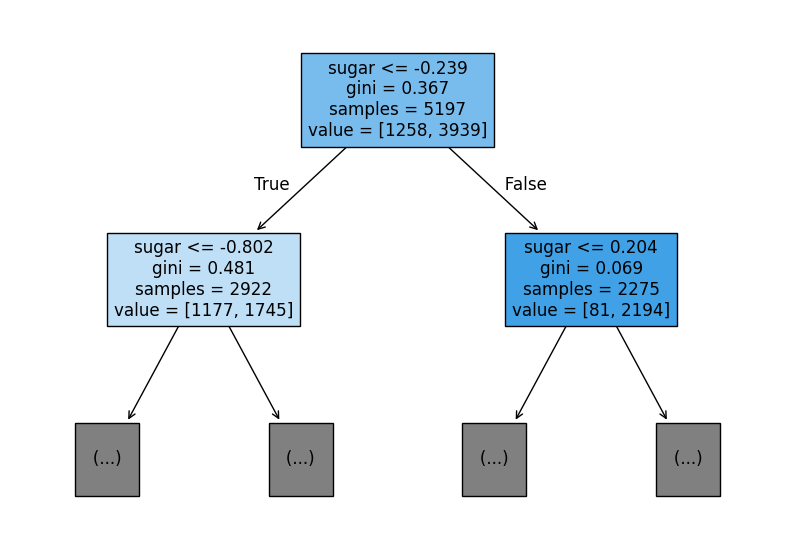

In [133]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar', 'ph'])
plt.show()

- 위 트리 그림을 해석해 보자.
- 노드 안에는 4가지의 정보가 들어있다.
  - 1번째 : 테스트조건
  - 2번째 : 불순도(gini), 0에 가까울 수록 가장 좋다. 0.5 최악 
  - 3번째 : 총 샘플 수
  - 4번째 : 클래스별 샘플 수
- 루트 노드는 당도(sugar)가 -0.239 이하인지 질문한다. 만약 어떤 샘플의 당도가 -0.239와 같거나 작으면 왼쪽 가지로 간다. 그렇지 않으면 오른쪽 가지로 이동한다. 즉, 왼쪽이 Yes, 오른쪽이 No 이다.
- 루트 노드의 총 샘플 수는 5,197개이고 이중에서 음성 클래스(레드 와인)는 1,258개, 양성 클래스(화이트 와인)는 3,939개
- 노드의 바탕 색깔을 보면 루트 노드보다 오른쪽 노드의 색이 진하고 왼쪽 노드의 색은 연해졌다. plot_tree() 함수에서 filled=True로 지정하면 클래스 마다 색깔을 부여하고 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시한다.
- 결정 트리에서 예측하는 방법은 간단하다. 리프 노드에서 가장 많은 클래스가 예측 클래스가 된다. 만약 이 결정 트리의 성장을 여기에서 멈춘다면 왼쪽 노드에 도달한 샘플과 오른쪽 노드에 도달한 샘플은 모두 양성 클래스(화이트 와인)로 예측된다.두 노드 모두 양성 클래스의 개수가 많기 때문이다.

##  **불순도**
- gini는 지니 불순도를 의미한다.
- DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'이다.
- criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것
- 지니 불순도 = 1-(음성클래스 비율^2 + 양성클래스 비율^2)
- 다중 분류 문제라면 클래스가 더 많겠지만 계산하는 방법은 동일
- 위 트리의 루트 노드의 지니 불순도 계산
  - 1 - ( (1258 / 5197) ** 2 + ( 3939 / 5197 ) ** 2 ) = 0.367

- 만약 100개의 샘플이 있는 어떤 노드의 두 클래스의 비율이 정확히 1/2씩이라면 지니 불순도는 0.5가 되어 최악이 된다.
  -  1 - ( (50/100) ** 2 ) + ( 50/100) ** 2 ) = 0.5
  
- 노드에 하나의 클래스만 있다면 지니 불순도는 0이 되어 가장 작다. 이런 노드를 순수 노드라고 한다.
  - 1 - ( ( 0/100) **2  + ( 100/100) **2 ) = 0
  
- 결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다.

## **부모 노드와 자식 노드의 불순도 차이 계산**

자식 노드의 불순도를 샘플 개수에 비례하여 모두 더한다음 부모 노드의 불순도에서 빼면 된다.
    
  - 부모의 불순도 - ( (왼쪽노드샘플 수 / 부모의 샘플수) * 왼쪽 노드 불순도 + ( 오른쪽노드샘플 수 / 부모의 샘플수) * 오른쪽 노드 불순도 )
  - 0.367 - ( (2922/5197) * 0.481 + (2275/5197) * 0.069 )
    
- 부모와 자식 노드 사이의 불순도 차이를 정보 이득(information gain)이라고 부른다.
    

## **엔트로피 불순도**
- DecisionTreeClassifier 클래스에서 criterion='entropy'를 지정하여 엔트로피 불순도 를 사용할 수 있다.
- 엔트로피 불순도는 밑이 2인 로그를 사용하여 곱한다.
- 루트 노드의 엔트로피 불순도 계산

   -음성클래스 비율 * log(음성클래스 비율) - 양성클래스 비율 * log(양성 클래스 비율)
   
     = -(1258/5197) * log(1258/5197) - (3939/5197) * log(3939/5197) = 0.798

In [172]:
1 - ((1258/5197) ** 2 + (3939/5197) ** 2)

0.3669367279393918

In [153]:
1 - ((1177/2922) ** 2 + (1745/2922) ** 2)

0.481106768216382

In [155]:
1 - ((0/100) ** 2 + (100/100) ** 2) #  가장 순수한 지니불순도 상태 음성X, 양성만

0.0

In [157]:
1 - ((50/100) ** 2 + (50/100) ** 2) #  가장 순수한 지니불순도 상태 음성X, 양성만

0.5

- 결정트리는 불순도 기준을 사용해 정보 이득이 최대가 되도록 노드를 분할
- 노드를 순수하게 나눌수록 정보 이득이 커진다.
- 새로운 샘플에 대해 예측할 때에는 노드의 질문에 따라 트리를 이동한다.
- 그리고 마지막에 도달한 노드의 클래스 비율을 보고 예측을 만든다.
- 앞의 트리는 제한 없이 자라났기 때문에 훈련 세트보다 테스트 세트에서 점수가 크게 낮았다. 이 문제를 해결해 보자

## **가지치기**
- 결정트리에서 가지치기를 해야한다. 그렇지 않으면 무작정 끝까지 자라나는 트리가 만들어진다. 그렇게 되면 훈련세트에는 잘 맞겠지만 테스트세트에서 점수는 그에 못 미칠 것이다. 이를 두고 **일반화가 잘 안 될 것 같다**고 한다.
- 결정트리에서 가지치기하는 가장 간단한 방법은 자라날 수 있는 트리의 최대 깊이를 지정하는 것

In [193]:
# DecisionTreeClassifier 클래스의 max_depth 매개변수를 3으로 지정하여 모들을 만들어 보자
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


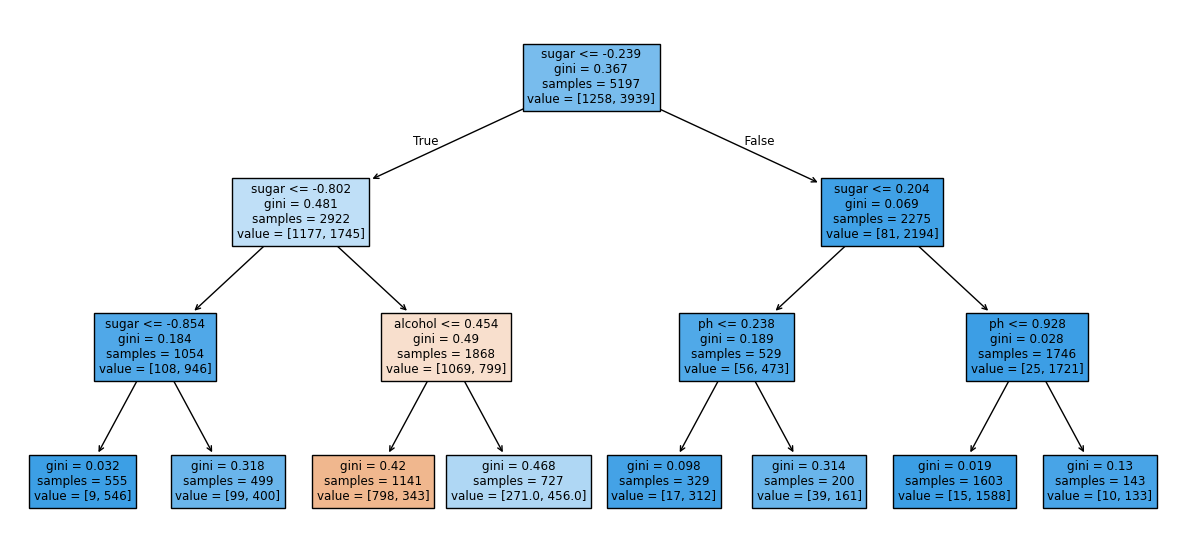

In [209]:
# 트리 그림으로 그려서 이해해 보자
plt.figure(figsize=(15,7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'ph'])
plt.show()

- 당도가 -0.802보다 크고 -0.239 작거나 같은 와인 중에 알콜 도수가 0.454와 같거나 작은 것이 레드 와인이다.

- 당도가 -0.802보다 크다??? 이해가 되나?
- 불순도를 기준으로 샘플을 나눈다고 했다. 불순도는 클래스별 비율을 가지고 계산했다. 샘플을 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일이 계산에 영향을 미칠까? 아니다. 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않는다. 따라서 표준화 전처리를 할 필요가 없다. 이것이 결정 트리 알고리즘의 또 다른 장점 중 하나이다.

In [213]:
# 전처리 하기 전의 훈련세트(train_input)와 테스트세트(test_input)로 결정 트리 모델을 다시 훈련해 보자
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


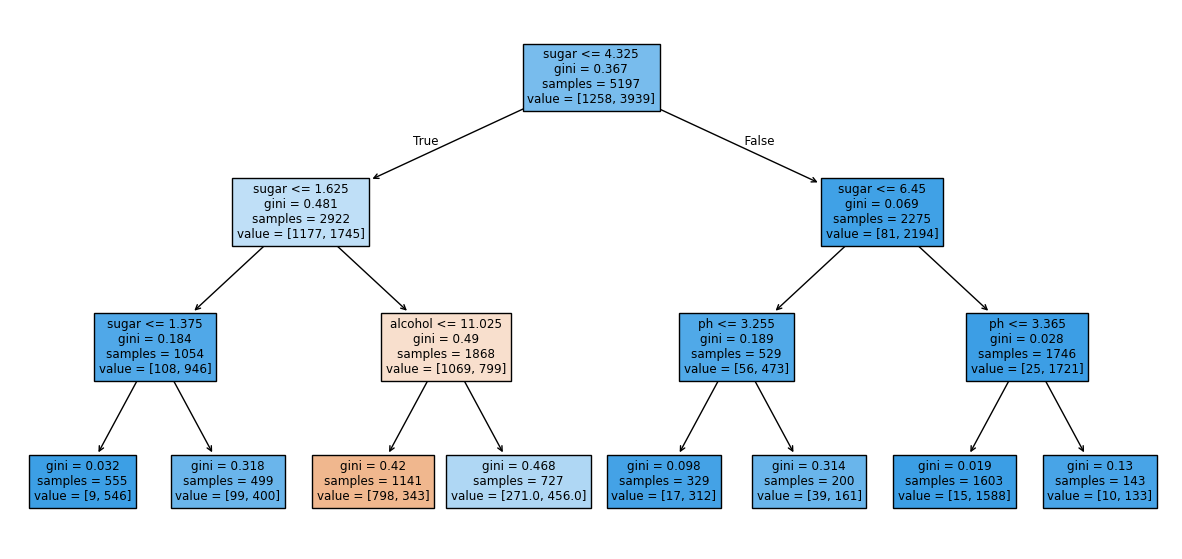

In [215]:
# 트리 그림도 그려보자
plt.figure(figsize=(15,7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'ph'])
plt.show()

- 당도가 1.625보다 크고 4.324보다 작거나 같은 와인 중에 알콜 도수가 11.025와 같거나 작은 와인이 레드와인이고 나머지는 화이트와인

## **특성 중요도**
- 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해 준다.
- 특성 중요도는 결정 트리 모델의 feature_importances_ 속성에 저장되어 있다.

In [223]:
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

- 특성 중요도를 활용하면 결정 트리 모델을 특성 선택에 활용할 수 있다.

In [ ]:
train_score = []
test_score = []

dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))


True

## **교차검증(Cross Validation, CV)**